<a href="https://colab.research.google.com/github/ZonaQuant/Notebooks/blob/main/sixty_forty_FUNCIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qstrader


In [ ]:
pip install yahoo_fin yfinance pandas numpy

In [2]:
from qstrader.alpha_model.fixed_signals import FixedSignalsAlphaModel
from qstrader.asset.equity import Equity
from qstrader.asset.universe.static import StaticUniverse
from qstrader.data.backtest_data_handler import BacktestDataHandler
from qstrader.data.daily_bar_csv import CSVDailyBarDataSource
from qstrader.statistics.tearsheet import TearsheetStatistics
from qstrader.trading.backtest import BacktestTradingSession

In [3]:
import pandas as pd
import pytz
import yfinance as yf


In [4]:
dataframe =pd.DataFrame()
spy = yf.download("SPY")
#dataframe['SPY'] = spy['Adj Close']
agg = yf.download("AGG")
#dataframe['AGG'] = agg['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
start_dt = pd.Timestamp('2013-09-30 14:30:00', tz=pytz.UTC)
end_dt = pd.Timestamp('2019-12-31 23:59:00', tz=pytz.UTC)

In [14]:
df = pd.read_csv('/content/SPY.csv')

In [ ]:
csv_dir = os.environ.get('QSTRADER_CSV_DATA_DIR', '.')
data_source = CSVDailyBarDataSource(csv_dir, Equity, csv_symbols=strategy_symbols)
data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

In [17]:
csv_dir = '/content/'
strategy_symbols = ['SPY', 'AGG']
data_source = CSVDailyBarDataSource(csv_dir, Equity, csv_symbols=strategy_symbols)
data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

Loading CSV files into DataFrames...
Loading CSV file for symbol 'EQ:SPY'...
Loading CSV file for symbol 'EQ:AGG'...
Adjusting pricing in CSV files...
Adjusting CSV file for symbol 'EQ:SPY'...
Adjusting CSV file for symbol 'EQ:AGG'...


In [20]:
strategy_symbols = ['SPY', 'AGG']
strategy_assets = ['EQ:%s' % symbol for symbol in strategy_symbols]
strategy_universe = StaticUniverse(strategy_assets)

In [21]:
 data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

In [ ]:
strategy_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 0.6, 'EQ:AGG': 0.4})
strategy_backtest = BacktestTradingSession(
        start_dt,
        end_dt,
        strategy_universe,
        strategy_alpha_model,
        rebalance='end_of_month',
        long_only=True,
        cash_buffer_percentage=0.01,
        data_handler=data_handler
  )
strategy_backtest.run()

In [ ]:
  # Construct benchmark assets (buy & hold SPY)
benchmark_assets = ['EQ:SPY']
benchmark_universe = StaticUniverse(benchmark_assets)

    # Construct a benchmark Alpha Model that provides
    # 100% static allocation to the SPY ETF, with no rebalance
benchmark_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 1.0})
benchmark_backtest = BacktestTradingSession(
        start_dt,
        end_dt,
        benchmark_universe,
        benchmark_alpha_model,
        rebalance='buy_and_hold',
        long_only=True,
        cash_buffer_percentage=0.01,
        data_handler=data_handler
    )
benchmark_backtest.run()

Plotting the tearsheet...


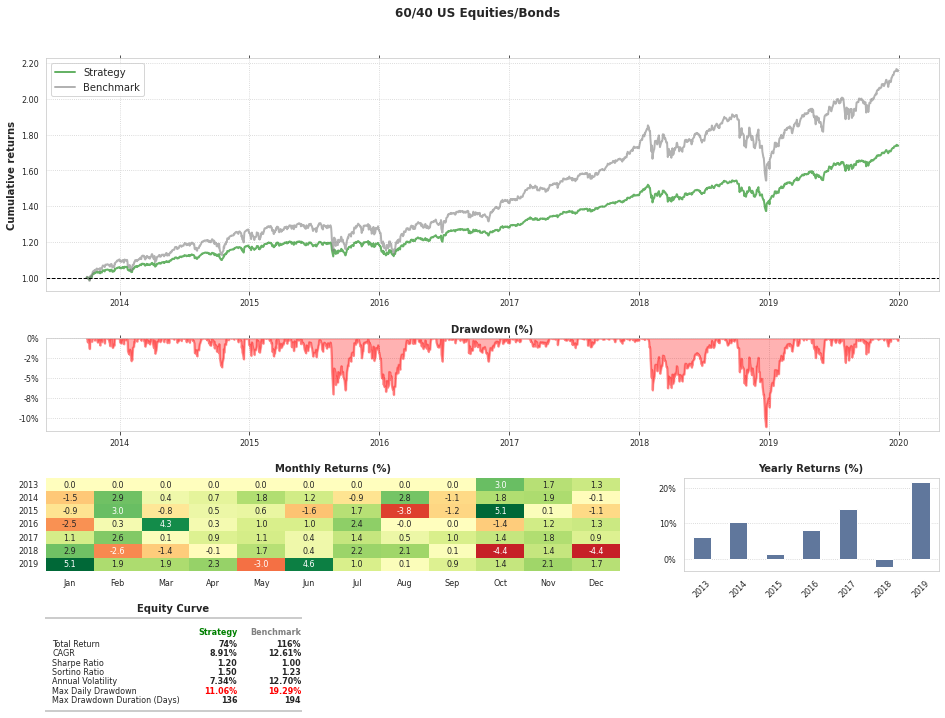

In [25]:
# Performance Output
tearsheet = TearsheetStatistics(
        strategy_equity=strategy_backtest.get_equity_curve(),
        benchmark_equity=benchmark_backtest.get_equity_curve(),
        title='60/40 US Equities/Bonds'
    )
tearsheet.plot_results()

# Nueva sección